<a href="https://colab.research.google.com/github/Favour-Aransiola/Prediction-of-CSTR-Reaction-Order/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Chemical Reaction Order From CSTR Process Data**

Data Features: Concentration of A in the inlet flow, Temperature of the inlet flow, Temperature of the inlet coolant flow, Coolant flow-rate, Concentration of B in the outlet flow, Temperature of the outlet flow, Temperature of the outlet coolant flow.

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,confusion_matrix,ConfusionMatrixDisplay

In [18]:
control_data =np.load('./cstr_rawdata.npy')


In [43]:
two_hundred_minute_data = control_data[:,1393:1400]
class_labels = control_data[:,1400]
domain_labels = control_data[:,1401]
noise=control_data[:,1402]
rxn_order = control_data[:,1403]


rxn_order = np.reshape(rxn_order,(-1,1))

In [45]:
# Adding the feature to the label for complete dataset
dataset = np.concat([two_hundred_minute_data,rxn_order],axis=1)


In [50]:
dataset =pd.DataFrame(dataset,columns=['Concentration of A in the inlet flow', 'Temperature of the inlet flow', 'Temperature of the inlet coolant flow', 'Coolant flow-rate', 'Concentration of B in the outlet flow', 'Temperature of the outlet flow', 'Temperature of the outlet coolant flow','Reaction Order'])
dataset['Reaction Order'].value_counts()

,count
Reaction Order,
1.0,2080
0.5,260
1.5,260
2.0,260


In [52]:
dataset.isnull().sum()
# This dataset doesnt contain any null values.

,0
Concentration of A in the inlet flow,0
Temperature of the inlet flow,0
Temperature of the inlet coolant flow,0
Coolant flow-rate,0
Concentration of B in the outlet flow,0
Temperature of the outlet flow,0
Temperature of the outlet coolant flow,0
Reaction Order,0


In [54]:
# investigating more details about the dataset
dataset.describe()

,Concentration of A in the inlet flow,Temperature of the inlet flow,Temperature of the inlet coolant flow,Coolant flow-rate,Concentration of B in the outlet flow,Temperature of the outlet flow,Temperature of the outlet coolant flow,Reaction Order
count,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000
mean,131.008747,131.797927,133.014069,131.363750,131.253135,133.280031,131.507853,1.090909
std,56.660702,55.722405,55.376838,56.459817,56.351131,55.318491,56.046644,0.357972
min,-28.776068,-29.148348,-29.603963,-29.758094,-30.041479,-30.434712,-30.544518,0.500000
25%,113.608653,114.266926,117.510980,113.851267,113.667457,116.743183,113.973252,1.000000
50%,146.564673,146.933724,147.376295,147.545100,147.598092,147.516566,147.022186,1.000000
75%,161.264631,161.417492,161.671971,160.662110,160.448782,162.810450,160.359030,1.000000
max,201.311669,201.192251,201.353696,201.369769,201.495843,201.295641,201.098087,2.000000


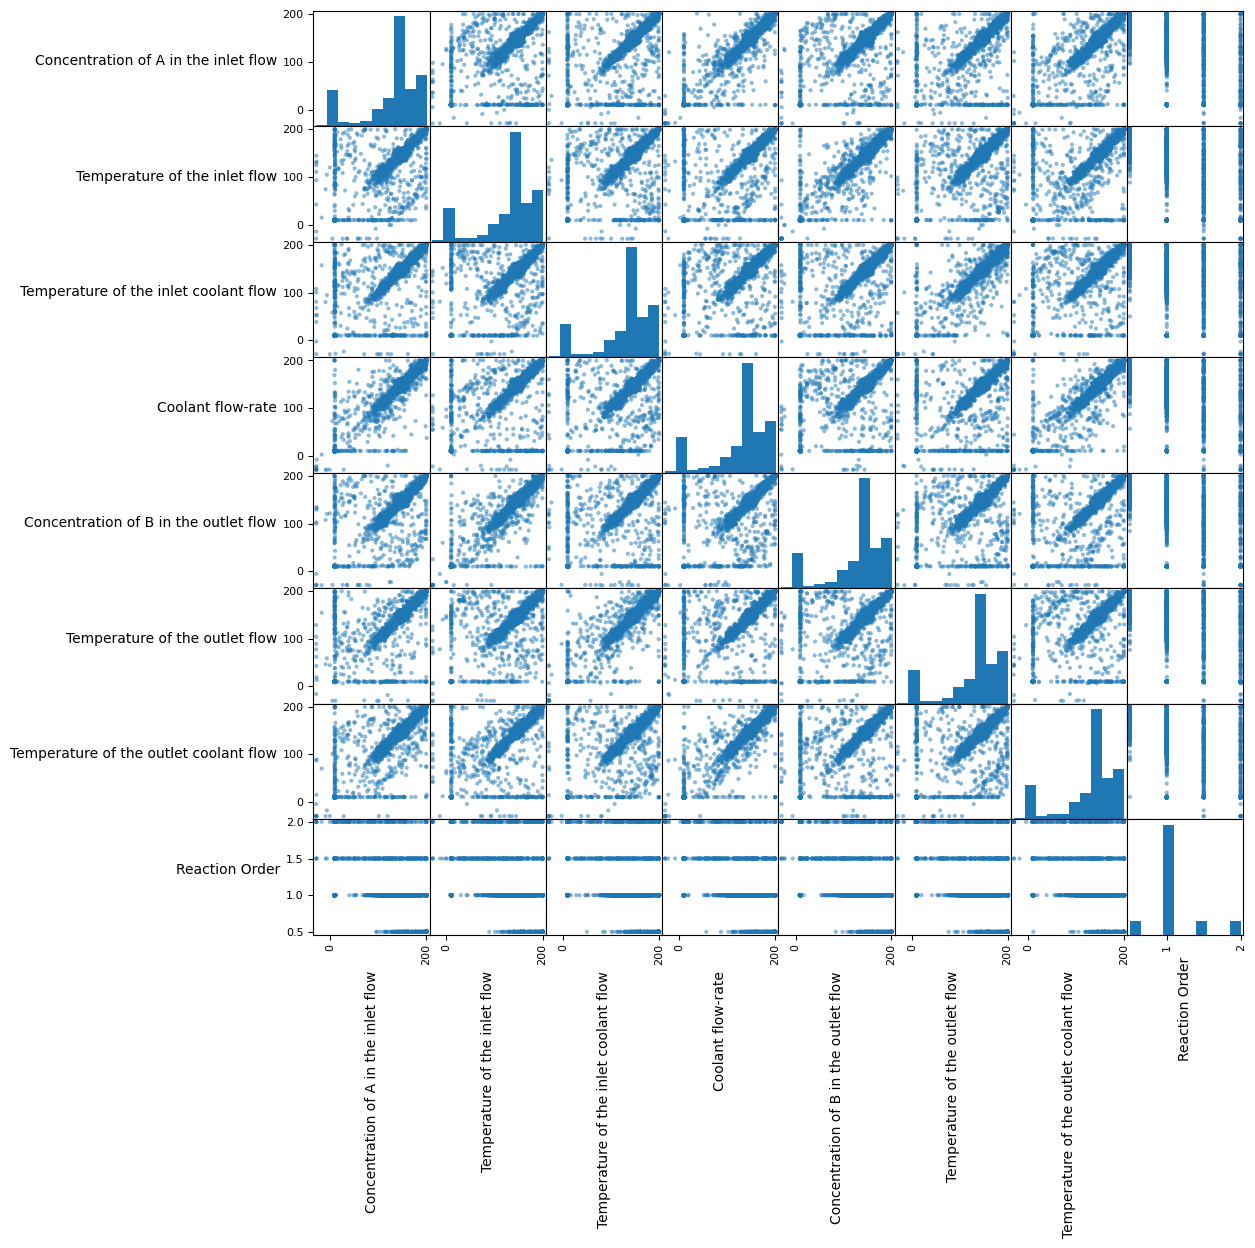

In [69]:

axes = pd.plotting.scatter_matrix(dataset, figsize=(12,12), alpha=0.5)
for ax in axes.flatten():
  ax.xaxis.label.set_rotation(90)
  ax.yaxis.label.set_rotation(0)
  ax.yaxis.label.set_ha('right')


<Axes: >

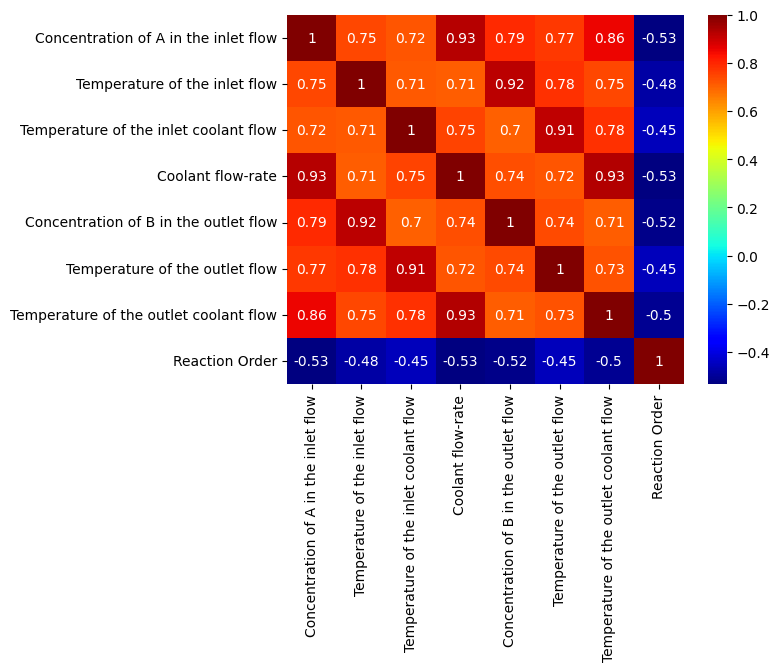

In [72]:
corr = dataset.corr()

sns.heatmap(corr, annot=True, cmap=plt.get_cmap('jet'))

In [101]:
# Implementing Stratified Data Spliting

def stratified_split(df):

  X= df.drop(columns=['Reaction Order'])
  Y = df['Reaction Order']
  X_train = None
  X_test = None
  Y_train = None
  Y_test = None

  spliter = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2 ,random_state= 42)

  for training_index, testing_index in spliter.split(X,Y):

    X_train,Y_train = X.iloc[training_index],Y.iloc[training_index]
    X_test,Y_test = X.iloc[testing_index],Y.iloc[testing_index]

  return X_train.values, X_test.values, Y_train.values.round(0).astype(int), Y_test.values.round(0).astype(int)





In [102]:
# Splitting Dataset into train and test
X_train, X_test, Y_train, Y_test= stratified_split(dataset)

In [111]:
logistic_reg = LogisticRegression(max_iter=10000)
decision_tree = DecisionTreeClassifier()
k_neighbour = KNeighborsClassifier(5)
random_forest = RandomForestClassifier()

In [112]:
# Fitting the models and making predictions

# Logistic Regression
logistic_reg.fit(X_train,Y_train)
Y_pred_log = logistic_reg.predict(X_test)


# Tree Classifier
decision_tree.fit(X_train,Y_train)
Y_pred_deci = decision_tree.predict(X_test)


# K-Neighbour Classifier
k_neighbour.fit(X_train,Y_train)
Y_pred_k_neigbour = k_neighbour.predict(X_test)


# Random Forest Classifier

random_forest.fit(X_train,Y_train)
Y_pred_random_for = random_forest.predict(X_test)



In [134]:
# Accuracy

accuracy = [
    accuracy_score(Y_test,Y_pred_log),
    accuracy_score(Y_test,Y_pred_deci),
    accuracy_score(Y_test,Y_pred_k_neigbour),
    accuracy_score(Y_test,Y_pred_random_for),
]
accuracy

[0.7307692307692307,
 0.8146853146853147,
 0.8531468531468531,
 0.8618881118881119]

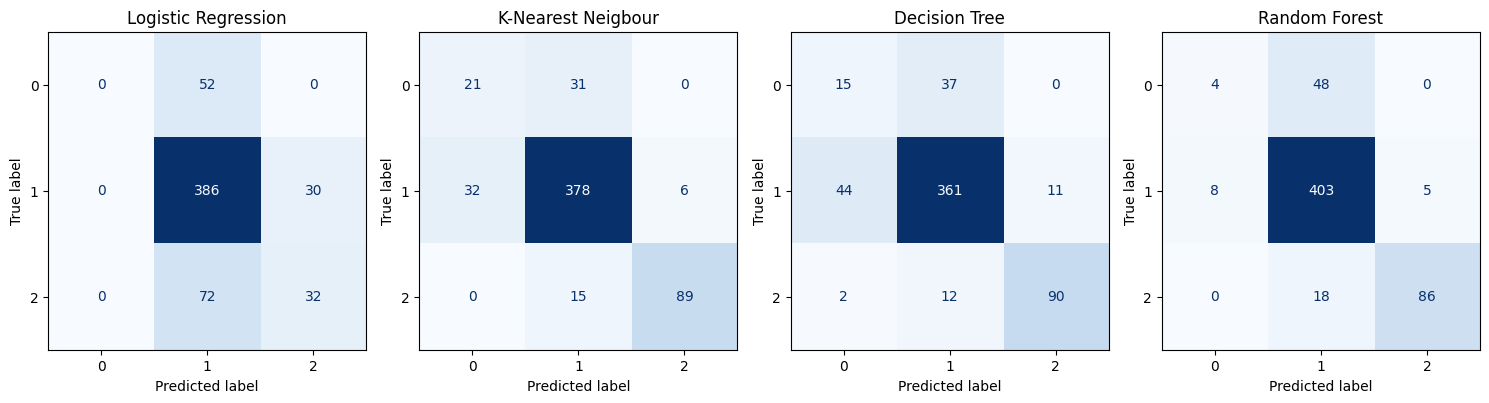

In [133]:
# Confusion Matrix

models = {
    "Logistic Regression": Y_pred_log,
    "K-Nearest Neigbour":Y_pred_k_neigbour,
    "Decision Tree": Y_pred_deci,
    "Random Forest": Y_pred_random_for,
}

fig, axes = plt.subplots(1, len(models), figsize=(15, 4))

for ax, (title, preds) in zip(axes, models.items()):
    cm = confusion_matrix(Y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()
